<h1> Data Wrangling </h1>

Data Wrangling popularly known as Data Cleansing is the process of converting the data from the initial format to a proper format with no missing values and accurate data types which will be useful later for the analysis.

In [1]:
#importing pandas and matplotlib libraries
import pandas as pd
import matplotlib.pylab as plt

### Reading the file from the URL and adding headers

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filename, names = headers)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Identifying the missing values and handling them

## Identifying the missing values

In [5]:
#Converting "?" to NaN
import numpy as np
df.replace("?",np.nan, inplace = True)
#viewing the changes made
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluating the missing values

In [6]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Counting missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns contain  missing values which are:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

### Dealing with the missing data in this dataset
<hr>
<b>Replacing by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replacing by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Dropping the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [9]:
#calculating the average mean of normalized-losses
avg_normalizedLoss = df['normalized-losses'].astype("float").mean(axis=0)

#replacing NaN values with average mean of the column
df["normalized-losses"].replace(np.nan, avg_normalizedLoss ,inplace = True)

In [10]:
#calculating the avg mean of stroke
avg_Stroke = df["stroke"].astype("float").mean(axis=0)

#replacing NaN with avg mean
df["stroke"].replace(np.nan, avg_Stroke, inplace= True)

In [11]:
#calculating the avg mean of bore
avg_bore = df['bore'].astype("float").mean(axis=0)

#replacing NaN values with average mean of the column
df["bore"].replace(np.nan, avg_bore, inplace = True)

In [12]:
#calculating the avg mean of horsepower
avg_hp = df["horsepower"].astype("float").mean(axis = 0)

#replacing NaN with avg horsepower
df["horsepower"].replace(np.nan, avg_hp, inplace = True)

In [13]:
#calculating the avg mean of peak-rpm

avg_peakRPM = df["peak-rpm"].astype("float").mean(axis=0)

#replacing NaN with avg peak-rpm
df["peak-rpm"].replace(np.nan, avg_peakRPM, inplace = True)

In [14]:
#viewing the changes made
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
#checking the values present in num-of-doors column
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [16]:
#calculating the most common type of value in the column
df["num-of-doors"].value_counts().idxmax()

'four'

In [17]:
#replacing the most frequently occuring value with the missing values
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [18]:
#Dropping the rows with missing "price" values
df.dropna(subset = ["price"],axis = 0, inplace = True)

#resetting the index as twop rows were dropped
df.reset_index(drop = True, inplace = True)

In [19]:
#viewing the changes made 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correcting the abnormal datatypes of the column

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Issues with the datatype of the columns
'bore' ,'stroke', 'normalized-losses', 'price','peak-rpm' variables are numerical values that describe the engines, which are expected to be of the type 'float' or 'int'. However, they are shown as type 'object', thus converting their data types into a numerical format.

In [21]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")

In [22]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [23]:
#viewing the new data types
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardisation
<p>
Data is usually collected from different agencies with different formats.It is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation.
</p>
<p>Standardization is the process of transforming data into a common format which allows us to make a meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In this dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assuming that I am developing an application in a country that accepts the fuel consumption with L/100km standard, </p>
<p>I will need to apply <b>data transformation</b> to transform mpg into L/100km</p>

<hr>

Applying the below formula for conversion :
L/100km = 235 / mpg

In [24]:
#converting city-mpg to L/100 km 
df["city-L/100 km"] = 235/df["city-mpg"]

#viewing the transformation
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100 km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [25]:
# Transforming mpg to L/100 km

df["highway-mpg"] = 235/df["highway-mpg"]

# renaming column
df.rename(columns={"highway-mpg":"highway-L/100km"}, inplace = True)

#viewing the transformation
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100 km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


## Data Normalization

<p> <b> Normalization </b> is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1.
</p>

<b>Example</b>
<p>To demonstrate normalization, let's say I want to scale the columns "length", "width" and "height" : </p>
<p><b>Target:</b> I would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> <u> replacing original value by (original value)/(maximum value) </u>
    


In [26]:
# Replacing the original value by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [27]:
#viewing the new normalized values
df[["length", "width", "height"]]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


<h2 id="binning">Binning</h2>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>
<p>In this dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. I am rearranging them into three ‘bins' to simplify analysis i.e :<u> high horsepower, medium horsepower, and little horsepower </u> <br> Thus analysing the price difference according to these three categorisation of Horsepower. </p>
<hr>
<p> Using the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>



In [28]:
#correcting the data format
df[["horsepower"]] = df[['horsepower']].astype(int, copy = True)

### Plotting the histogram of the Horsepower to check the distribution

Text(0.5, 1.0, 'Horsepower Bins')

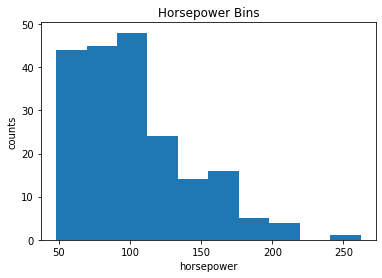

In [30]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

#setting the x-y labels and Plot titles
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("counts")
plt.pyplot.title("Horsepower Bins")

<p> Categorising Horsepower into  3 bins of equal size bandwidth, thus using  numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p> <ul>
<li> Setting start_value=min(df["horsepower"]), because including the minimum value of horsepower here. </li>
<li>>Setting end_value=max(df["horsepower"]), because including the maximum value of horsepower here. </li>
<li>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</li> 
   </ul> </p> 

In [31]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [32]:
hp_group_names = ["Low", "Medium", "High"]

Applying the function "cut" to determine in which group each value of df["horsepower"] belongs to.

In [33]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = hp_group_names, include_lowest = True)

In [34]:
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [47]:
#Viewing the number of cars in each group
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

### Plotting the distribution of each bin

Text(0.5, 1.0, 'Horsepower Bins')

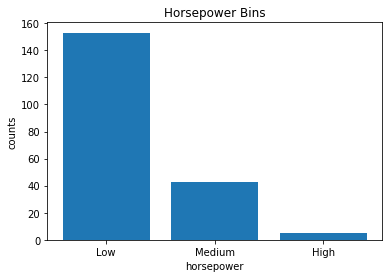

In [51]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(hp_group_names, df["horsepower-binned"].value_counts())

#setting x-y labels and bar graph title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("counts")
plt.pyplot.title("Horsepower Bins")

### Using the Histogram to visualise Horsepower bins

Text(0.5, 1.0, 'Horsepower Bins')

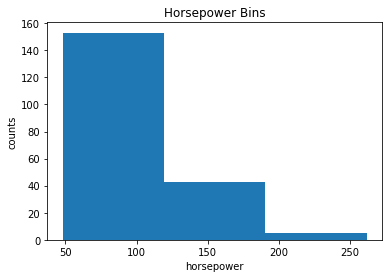

In [52]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

#drawing the histogram with bins
plt.pyplot.hist(df["horsepower"], bins = 3)

#setting the x-y labels and title of the histogram
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("counts")
plt.pyplot.title("Horsepower Bins")

The plot above shows the binning result for attribute "horsepower". 

<h2 id="indicator">Indicator variable</h2>
<hr>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<p>
    They are used to assign numbers to  categorical variables for regression analysis.
</p>
<br>
<b>Example</b>
<p>
   In the column "fuel-type" there are two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, converting "fuel-type" into indicator variables.
</p>

<p>
    Using pandas method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [54]:
dummy_var = pd.get_dummies(df["fuel-type"])
dummy_var.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [55]:
#renaming the columns 
dummy_var.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace = True)

In [56]:
dummy_var.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [57]:
#merging the dummy variable with the original dataframe
df = pd.concat([df, dummy_var], axis = 1)
df.drop("fuel-type", axis =1, inplace = True)

In [58]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100 km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


In [59]:
# Creating indicator variables for aspiration column 
dummy_var2 = pd.get_dummies(df['aspiration'])

#renaming columns
dummy_var2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace = True)

#viewing changes
dummy_var2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


### Saving the dataset

In [60]:
df.to_csv('/Users/saumyasingh/Documents/DataScience/Automobile DataSet Analysis/clean_df.csv')